# 대구시 구 별 보안등설치개수와 ECLO(인명피해 심각도) 간의 상관분석
- 예측 모델에 사용할 feature을 설정하기 위해 독립변수(보안등 설치 개수)와 타겟변수(ECLO) 간의 상관관계를 알아봄
- 보안등설치개수가 낮을수록 ECLO 값이 높아야 분석주제에 맞는 의미있는 feature라고 생각해
- 두 변수 간 음의 상관계수가 나와야 유의미한 feature라고 볼 수 있음

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 한글 문제
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 1. 데이터 준비
1. 대구 보안등 정보
2. ECLO값이 있는 train dataset

In [ ]:
security_light = pd.read_csv('./open/external_open/대구 보안등 정보.csv', encoding = "cp949", low_memory=False)
security_light.head()

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주


In [ ]:
eclo = pd.read_csv('./open/train.csv', encoding = "cp949", low_memory=False)
eclo.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


## 2. 데이터 전처리
- 데이터셋 별 주소 데이터를 구별로 묶어 구 별 보안등설치개수와 ECLO 점수 합계를 추출

In [ ]:
security_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71913 entries, 0 to 71912
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   보안등위치명    71913 non-null  object 
 1   설치개수      71913 non-null  int64  
 2   소재지도로명주소  34646 non-null  object 
 3   소재지지번주소   71913 non-null  object 
 4   위도        43602 non-null  float64
 5   경도        43602 non-null  float64
 6   설치연도      29397 non-null  float64
 7   설치형태      35373 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


In [ ]:
security_light.isnull().sum()

보안등위치명          0
설치개수            0
소재지도로명주소    37267
소재지지번주소         0
위도          28311
경도          28311
설치연도        42516
설치형태        36540
dtype: int64

In [ ]:
df.isnull().sum(axis=0) / len(df)

보안등위치명      0.000000
설치개수        0.000000
소재지도로명주소    0.518223
소재지지번주소     0.000000
위도          0.393684
경도          0.393684
설치연도        0.591214
설치형태        0.508114
dtype: float64

### 2.1 구 별 보안등 설치 개수

In [ ]:
security_light01 = security_light[['설치개수', '소재지지번주소']]
security_light01.head()

,설치개수,소재지지번주소
0,1,대구광역시 남구 대명동 1722-4
1,1,대구광역시 남구 대명동 1723-11
2,1,대구광역시 남구 대명동 1722-56
3,2,대구광역시 남구 대명동 1722-41
4,1,대구광역시 남구 대명동 1721-22


In [ ]:
# 소재지지번주소중 '구'를 포함하는 단어만 추출
light_addr = security_light01.소재지지번주소.str.split(' ').str[1]
light_addr.value_counts()

소재지지번주소
수성구    11911
동구     11594
달서구    10083
북구      9257
서구      9028
달성군     7372
남구      7200
중구      5468
Name: count, dtype: int64

In [ ]:
security_light01 = security_light01.drop(security_light01.columns[1], axis=1)

In [ ]:
security_light01.head()

,설치개수
0,1
1,1
2,1
3,2
4,1


In [ ]:
light_addr_fin = pd.concat([security_light01, light_addr], axis=1)
light_addr_fin.head()

,설치개수,소재지지번주소
0,1,남구
1,1,남구
2,1,남구
3,2,남구
4,1,남구


In [ ]:
tmp = light_addr_fin.groupby('소재지지번주소')['설치개수'].sum()
security_light_fin = pd.DataFrame(tmp)
security_light_fin

,설치개수
소재지지번주소,
남구,7357
달서구,10083
달성군,7372
동구,11926
북구,9257
서구,9028
수성구,11911
중구,5468


### 2.2 구 별 ECLO 점수 합계

In [ ]:
eclo.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [ ]:
eclo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [ ]:
eclo_addr= eclo.시군구.str.split(' ').str[1].rename('구')
eclo_addr.value_counts()

구
달서구    9891
수성구    6707
북구     6650
동구     5341
서구     3495
달성군    2767
남구     2559
중구     2199
Name: count, dtype: int64

In [ ]:
eclo_pre = eclo[['시군구', 'ECLO']]
eclo_pre.head()

,시군구,ECLO
0,대구광역시 중구 대신동,5
1,대구광역시 달서구 감삼동,3
2,대구광역시 수성구 두산동,3
3,대구광역시 북구 복현동,5
4,대구광역시 동구 신암동,3


In [ ]:
eclo_pre = eclo_pre.drop(eclo_pre.columns[0], axis=1)

In [ ]:
eclo_pre.head()

,ECLO
0,5
1,3
2,3
3,5
4,3


In [ ]:
eclo_pre_fin = pd.concat([eclo_pre, eclo_addr], axis=1)
eclo_pre_fin.head()

,ECLO,구
0,5,중구
1,3,달서구
2,3,수성구
3,5,북구
4,3,동구


In [ ]:
tmp2 = eclo_pre_fin.groupby('구')['ECLO'].sum()
eclo_fin = pd.DataFrame(tmp2)
eclo_fin

,ECLO
구,
남구,11832
달서구,45681
달성군,14035
동구,26115
북구,31173
서구,16691
수성구,31706
중구,9987


In [ ]:
data_fin = pd.merge(eclo_fin, security_light_fin, left_on='구', right_index=True)
data_fin

,ECLO,설치개수
구,,
남구,11832,7357
달서구,45681,10083
달성군,14035,7372
동구,26115,11926
북구,31173,9257
서구,16691,9028
수성구,31706,11911
중구,9987,5468


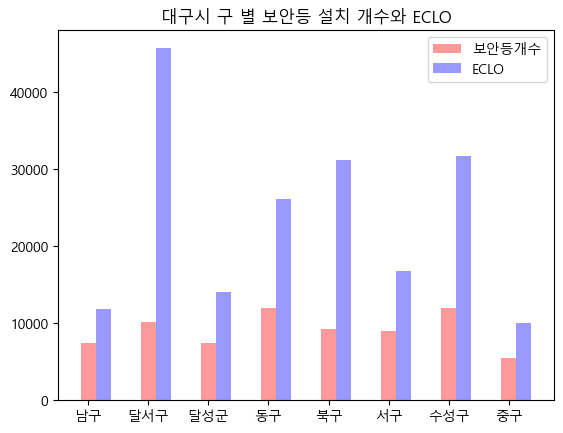

In [ ]:
cnt = merge_df.shape[0]
idx = np.arange(cnt)
w = 0.25

plt.bar(idx, data_fin['설치개수'], w, alpha=0.4, color='red', label='보안등개수')
plt.bar(idx+w, data_fin['ECLO'], w, alpha=0.4, color='blue', label='ECLO')

plt.xticks(idx, data_fin.index)
plt.title('대구시 구 별 보안등 설치 개수와 ECLO')
plt.legend()
plt.show()

## 3. 구 별 보안등 개수와 ECLO 점수간의 상관분석

In [ ]:
data_fin.corr()

,ECLO,설치개수
ECLO,1.000000,0.707761
설치개수,0.707761,1.000000


In [ ]:
np.corrcoef(data_fin['ECLO'], data_fin['설치개수'])

array([[1.        , 0.70776055],
       [0.70776055, 1.        ]])

## 상관관계 분석 결과
- 구 별 ECLO 점수와 보안등설치개수와의 상관계수가 0.7인 강한 양의 상관관계로 나옴
- 해당 데이터셋의 분석 관점은 보안등 설치 개수가 적은 구의 ECLO 점수가 높은 형태인 음의 상관계수가 나와야 유의미한 교통사고의 위험요인으로 판단해 예측모델 feature로 사용할 수 있지만
- 두 변수간의 강한 양의 상관계수가 나온것으로 보아 보안등 개수가 교통사고의 위험요인으로 보긴 어렵다